# Imports

In [1]:
import h5py

In [6]:
import numpy as np

In [15]:
from PIL import Image

In [184]:
import random

# Init function

In [281]:
file = '../Data/NYU_Silberman_100.mat'

In [282]:
dataset = h5py.File(file,'r')

images = np.array(dataset['Images']).transpose([3,2,1,0])

normals = np.array(dataset['Normals']).transpose([3,2,1,0])

masks = np.array(dataset['Masks']).transpose([2,1,0])

rotations = np.array(dataset['Rotations']).transpose([2,0,1])

In [259]:
rotations.dtype

dtype('float32')

# Crop function

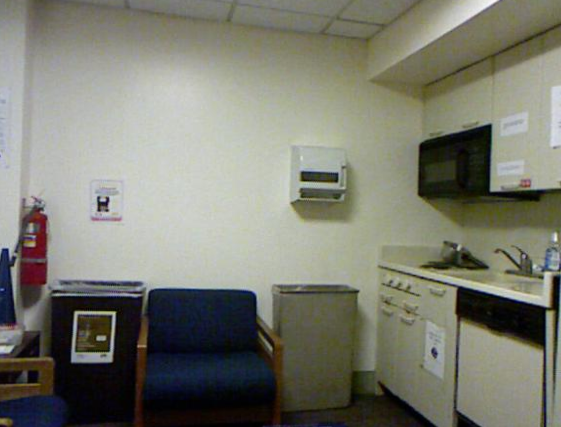

In [283]:
Image.fromarray(images[0,:,:,:], 'RGB')

In [301]:
index = 0 
height = 240 
width = 320

maxHeightIndex = 427 - height
heightIndex = np.random.randint(0,maxHeightIndex)
    
maxWidthIndex = 561 - width
widthIndex = np.random.randint(0,maxWidthIndex)

In [302]:
heightIndex , widthIndex

(0, 178)

In [303]:
imgCrop = images[index, heightIndex:heightIndex+height, widthIndex:widthIndex+width, :]
normCrop = normals[index, heightIndex:heightIndex+height, widthIndex:widthIndex+width, :]
maskCrop = masks[index, heightIndex:heightIndex+height, widthIndex:widthIndex+width]

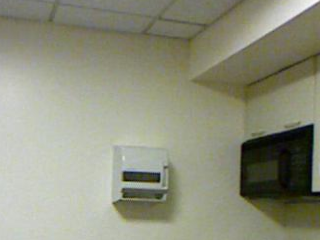

In [304]:
Image.fromarray(imgCrop, 'RGB')

# Next_Index

In [210]:
size = images.shape[0]
size = 3
queue = []

In [211]:
len(queue)

0

In [242]:
if (len(queue) == 0):
    queue = list(range(size))
    random.shuffle(queue)

In [245]:
queue.pop() 

0

# Get_Batch

In [255]:
np.empty([2,3], dtype=np.uint8)

array([[0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [265]:
batch_size = 3

In [310]:
bimages = np.empty([batch_size, height, width, 3], dtype=np.float32)
bnormals = np.empty([batch_size, height, width, 3], dtype=np.float32)
bmasks = np.empty([batch_size, height, width, 1], dtype=np.uint8)

In [311]:
bimages[0,:,:,:] = imgCrop

# Class Definition

In [24]:
%%writefile ../Code/Dataset.py
import h5py
import numpy as np
from random import shuffle

class Dataset:
    def __init__(self, file):
        
        self.dataset = h5py.File(file,'r')
        
        # (index, height, width, channels)
        self.images = np.array(self.dataset['Images']).transpose([3,2,1,0])
        self.normals = np.array(self.dataset['Normals']).transpose([3,2,1,0])
        self.masks = np.array(self.dataset['Masks']).transpose([2,1,0])
        self.rotations = np.array(self.dataset['Rotations']).transpose([2,0,1])
        # Image height and width
        self.width = self.images.shape[2]
        self.height = self.images.shape[1]
        # Number of samples in the dataset 
        self.size = self.images.shape[0]
        # Queue for choosing the samples
        self.queue = []
        
    def _random_crop(self, index, width, height):
        
        maxHeightIndex = self.height - height
        heightIndex = np.random.randint(0,maxHeightIndex)
    
        maxWidthIndex = self.width - width
        widthIndex = np.random.randint(0,maxWidthIndex)
        
        imgCrop = self.images[index, heightIndex:heightIndex+height, widthIndex:widthIndex+width, :]
        normCrop = self.normals[index, heightIndex:heightIndex+height, widthIndex:widthIndex+width, :]
        maskCrop = self.masks[index, heightIndex:heightIndex+height, widthIndex:widthIndex+width]
        
        return imgCrop, normCrop, maskCrop
    
    def _next_index(self):
        
        if (len(self.queue) == 0):
            self.queue = list(range(self.size))
            shuffle(self.queue)
        
        return self.queue.pop()
        
    def get_batch(self, batch_size, width, height):
        
        images = np.empty([batch_size, height, width, 3], dtype=np.float32)
        normals = np.empty([batch_size, height, width, 3], dtype=np.float32)
        masks = np.empty([batch_size, height, width, 1], dtype=np.uint8)
        
        for i in range(batch_size):
            ni = self._next_index()
            images[i,:,:,:], normals[i,:,:,:], masks[i,:,:,0] = self._random_crop(ni, width, height)
        
        return images, normals, masks

Overwriting ../Code/Dataset.py


# Testing the class

In [6]:
file = '../Data/NYU_Silberman_100.mat'

In [12]:
ds = Dataset(file)

In [13]:
img , norm , mask = ds.get_batch(4, 320, 240)

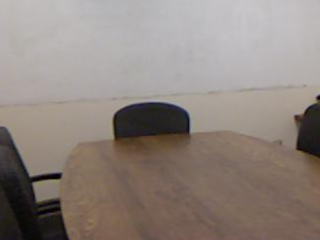

In [23]:
Image.fromarray(img[3,:,:,:].astype(np.uint8))

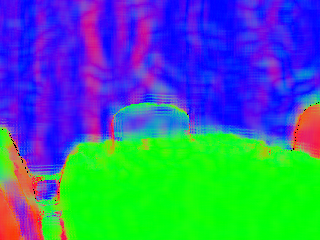

In [22]:
Image.fromarray((np.abs(norm[3,:,:,:])*255).astype(np.uint8))

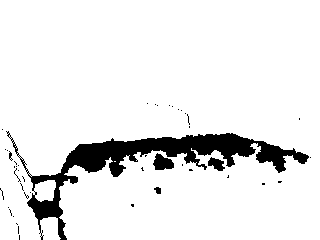

In [35]:
Image.fromarray(mask[3,:,:,:].reshape(240,320)*255)

In [37]:
masked = np.multiply(mask,norm)

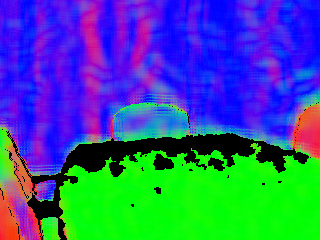

In [39]:
Image.fromarray((np.abs(masked[3,:,:,:])*255).astype(np.uint8))